<a href="https://colab.research.google.com/github/Jacob-Zac/Topic-Modeling/blob/main/Web_Scraping_Text_Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from bs4 import BeautifulSoup
import requests

In [ ]:
url = 'https://www.yelp.com/biz/pong-s-ramen-and-burger-claremont'
# Make a GET request to the target URL to get the raw HTML data
r = requests.get(url).text
# Use BeautifulSoup to parse HTML
soup = BeautifulSoup(r,'html.parser')

In [ ]:
print(soup)

<!DOCTYPE html>
<html lang="en-US" prefix="og: http://ogp.me/ns#" style="margin: 0;padding: 0; border: 0; font-size: 100%; font: inherit; vertical-align: baseline;"><head><script>document.documentElement.className=document.documentElement.className.replace(/no-js/,"js");</script><meta content="text/html; charset=utf-8" http-equiv="Content-Type"/><meta content="en-US" http-equiv="Content-Language"/><meta content="width=device-width, initial-scale=1, shrink-to-fit=no" name="viewport"/><link content="#FF1A1A" href="https://s3-media0.fl.yelpcdn.com/assets/srv0/yelp_large_assets/b2bb2fb0ec9c/assets/img/logos/yelp_burst.svg" rel="mask-icon" sizes="any"/><link href="https://s3-media0.fl.yelpcdn.com/assets/srv0/yelp_large_assets/dcfe403147fc/assets/img/logos/favicon.ico" rel="shortcut icon"/><script> window.ga=window.ga||function(){(ga.q=ga.q||[]).push(arguments)};ga.l=+new Date;window.ygaPageStartTime=new Date().getTime();</script><script>
            window.yelp = window.yelp || {};
      

In [ ]:
# Find all the review content with the same class name. The result is a list.
results = soup.findAll(class_='raw__09f24__T4Ezm', attrs={'lang':'en'})
# Print the result. We can see that there are still some markups.
for i in range(len(results)):
  print (results[i])

<span class="raw__09f24__T4Ezm" lang="en">I've been to Pong's twice now and both experiences were the same. Bad. The owner(?) of this establishment is incredibly snappy and acts as if he doesn't want customers at all.<br/><br/>They used to have customizable ramen in the past, but they don't have that option anymore. When we asked where their ramen went (because they weren't on the menu anymore), he pointed behind us so we turned around to find cup ramen on their shelves. So don't come here anticipating ramen.<br/><br/>Their food is just okay (not that great), but in addition to the owner(?)'s attitude, the place is practically begging for customers to stay away. Eat here at your own discretion...</span>
<span class="raw__09f24__T4Ezm" lang="en">I came here after visiting the garden to try a new restaurant.  I've ordered the Meat Lovers Burger, Ramen, and Steak Fries.  The cashier was super friendly and helpful with recommendations.  She also gave me a free drink while waiting for my or

In [ ]:
reviews = [result.text for result in results]
# Print the result, seprate by line. We can see that these markups are removed and the result is clean text.
# We now use a different way to print the list using * operator in new lines
print(*reviews, sep= '\n')

I've been to Pong's twice now and both experiences were the same. Bad. The owner(?) of this establishment is incredibly snappy and acts as if he doesn't want customers at all.They used to have customizable ramen in the past, but they don't have that option anymore. When we asked where their ramen went (because they weren't on the menu anymore), he pointed behind us so we turned around to find cup ramen on their shelves. So don't come here anticipating ramen.Their food is just okay (not that great), but in addition to the owner(?)'s attitude, the place is practically begging for customers to stay away. Eat here at your own discretion...
I came here after visiting the garden to try a new restaurant.  I've ordered the Meat Lovers Burger, Ramen, and Steak Fries.  The cashier was super friendly and helpful with recommendations.  She also gave me a free drink while waiting for my order.It's been some time since I've eaten the food and writing this review but if I recall correctly I thought t

In [ ]:
reviews= []
for result in results:
  reviews.append(result.text)

In [ ]:
# Find all the review Rating with the same class name. The result is a list.
results = soup.findAll(class_='raw__09f24__T4Ezm', attrs={'lang':'en'})
for date_element in date:
    print(f'<span class="css-chan6m">{date_element.text}</span>')
for i in range(len(results)):
  print (results[i])

NameError: name 'date' is not defined

In [ ]:
# Find all div elements with class 'user-passport-info css-1qn0b6x'
user_info_divs = soup.find_all('div', class_='user-passport-info css-1qn0b6x')

# Iterate through the extracted div elements
for user_info in user_info_divs:
    # Find the name element within the div
    name_element = user_info.find('a', class_='css-19v1rkv', role='link')

    # Extract and print the name
    if name_element:
        name = name_element.text
        print(name)


In [ ]:
ratings_class1 = soup.findAll('div', class_='css-10n911v')

# Extract ratings from the div elements within the span elements
ratings = []
for rating_container in ratings_class1:
    rating_div = rating_container.find('div', class_='css-14g69b3')
    if rating_div:
        rating_value = rating_div['aria-label'].split()[0]
        ratings.append(rating_value)

# Print the result for ratings
for rating in ratings:
    print(f"Rating: {rating}")

Rating: 1
Rating: 5
Rating: 5
Rating: 1
Rating: 5
Rating: 5
Rating: 5
Rating: 2
Rating: 5
Rating: 5
Rating: 4
Rating: 3
Rating: 5


In [ ]:
import re

# Find all the review Date elements with the class "css-chan6m" and "arrange-unit__09f24__rqHTg"
dates = soup.select('div.arrange-unit__09f24__rqHTg.css-1qn0b6x span.css-chan6m')

# Define a regular expression pattern for valid date format
date_pattern = r'^[A-Za-z]{3} \d{1,2}, \d{4}$'

# Extract and print the dates that match the expected format
for date in dates:
    date_text = date.text
    if re.match(date_pattern, date_text):
        print(f"Date: {date_text}")

Date: Sep 29, 2022
Date: Apr 9, 2021
Date: Feb 27, 2021
Date: Feb 24, 2023
Date: Jun 3, 2022
Date: Jan 1, 2021
Date: Dec 7, 2020
Date: Oct 8, 2021
Date: Jul 15, 2022
Date: Feb 18, 2022
Date: Jul 23, 2020
Date: Jul 7, 2020
Date: Mar 3, 2020


In [ ]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import numpy as np
import re
import time
import random

In [ ]:
# Parse the homepage of a business
url = 'https://www.yelp.com/biz/upland-rheumatology-center-upland-2?osq=doctors'
# Make a GET request to the target URL to get the raw HTML data
response = requests.get(url).text
# Use BeautifulSoup to parse HTML
soup = BeautifulSoup(response,'html.parser')

In [ ]:
# Parse the homepage of a business
url = 'https://www.yelp.com/biz/upland-rheumatology-center-upland-2?osq=doctors'
# Make a GET request to the target URL to get the raw HTML data
response = requests.get(url).text
# Use BeautifulSoup to parse HTML
soup = BeautifulSoup(response,'html.parser')
import re
number_reviews = soup.find (class_='css-foyide').text
number_reviews = int(re.findall('\d+', number_reviews)[0])
print (number_reviews)

48


In [ ]:
# Parse the homepage of a business
url = 'https://www.yelp.com/biz/upland-rheumatology-center-upland-2?osq=doctors'
# Make a GET request to the target URL to get the raw HTML data
response = requests.get(url).text
# Use BeautifulSoup to parse HTML
soup = BeautifulSoup(response,'html.parser')
import re
number_reviews = soup.find (class_='css-foyide').text
number_reviews = int(re.findall('\d+', number_reviews)[0])
print (number_reviews)
url_list = []
for i in range (0, number_reviews, 10):
  url_list.append('https://www.yelp.com/biz/upland-rheumatology-center-upland-2?osq=doctors'+str(i))
print (*url_list, sep='\n')

https://www.yelp.com/biz/upland-rheumatology-center-upland-2?osq=doctors0
https://www.yelp.com/biz/upland-rheumatology-center-upland-2?osq=doctors10
https://www.yelp.com/biz/upland-rheumatology-center-upland-2?osq=doctors20
https://www.yelp.com/biz/upland-rheumatology-center-upland-2?osq=doctors30
https://www.yelp.com/biz/upland-rheumatology-center-upland-2?osq=doctors40


In [ ]:

response = requests.get(url).text
soup = BeautifulSoup(response,'html.parser')
result = soup.findAll (class_='css-1q2nwpv')
print (len(result))

12


In [ ]:
# Parse the homepage of a business
url = 'https://www.yelp.com/biz/upland-rheumatology-center-upland-2?osq=doctors'
# Make a GET request to the target URL to get the raw HTML data
response = requests.get(url).text
# Use BeautifulSoup to parse HTML
soup = BeautifulSoup(response,'html.parser')
import re
number_reviews = soup.find (class_='css-foyide').text
number_reviews = int(re.findall('\d+', number_reviews)[0])
print (number_reviews)
url_list = []
for i in range (0, number_reviews, 10):
  url_list.append('https://www.yelp.com/biz/upland-rheumatology-center-upland-2?osq=doctors'+str(i))
print (*url_list, sep='\n')
response = requests.get(url).text
soup = BeautifulSoup(response,'html.parser')
result = soup.findAll (class_='css-1q2nwpv')
print (len(result))
import re

def extract_reviews(soup):
    reviews = []

    # Extracting dates
    dates = soup.select('div.arrange-unit__09f24__rqHTg.css-1qn0b6x span.css-chan6m')
    date_pattern = r'^[A-Za-z]{3} \d{1,2}, \d{4}$'
    valid_dates = [date.text for date in dates if re.match(date_pattern, date.text)]

    # Extracting ratings
    rating_containers = soup.findAll('div', class_='css-10n911v')
    ratings = [rating_div.find('div', class_='css-14g69b3')['aria-label'].split()[0] for rating_div in rating_containers if rating_div.find('div', class_='css-14g69b3')]

    # Extracting reviewer names
    user_info_divs = soup.find_all('div', class_='user-passport-info css-1qn0b6x')
    names = [user_info.find('a', class_='css-19v1rkv', role='link').text for user_info in user_info_divs if user_info.find('a', class_='css-19v1rkv', role='link')]

    # Extracting review texts
    review_elements = soup.findAll(class_='raw__09f24__T4Ezm', attrs={'lang':'en'})
    review_texts = [review.text for review in review_elements]

    # Combine the extracted data
    min_length = min(len(valid_dates), len(ratings), len(names), len(review_texts))
    for i in range(min_length):
      reviews.append({
        'date': valid_dates[i],
        'rating': ratings[i],
        'name': names[i],
        'review': review_texts[i]
     })

    return reviews


48
https://www.yelp.com/biz/upland-rheumatology-center-upland-2?osq=doctors0
https://www.yelp.com/biz/upland-rheumatology-center-upland-2?osq=doctors10
https://www.yelp.com/biz/upland-rheumatology-center-upland-2?osq=doctors20
https://www.yelp.com/biz/upland-rheumatology-center-upland-2?osq=doctors30
https://www.yelp.com/biz/upland-rheumatology-center-upland-2?osq=doctors40
12


In [ ]:

# Parse the homepage of a business
url = 'https://www.yelp.com/biz/upland-rheumatology-center-upland-2?osq=doctors'
# Make a GET request to the target URL to get the raw HTML data
response = requests.get(url).text
# Use BeautifulSoup to parse HTML
soup = BeautifulSoup(response,'html.parser')
import re
number_reviews = soup.find (class_='css-foyide').text
number_reviews = int(re.findall('\d+', number_reviews)[0])
print (number_reviews)
url_list = []
for i in range (0, number_reviews, 10):
  url_list.append('https://www.yelp.com/biz/upland-rheumatology-center-upland-2?osq=doctors'+str(i))
print (*url_list, sep='\n')
response = requests.get(url).text
soup = BeautifulSoup(response,'html.parser')
result = soup.findAll (class_='css-1q2nwpv')
print (len(result))
import re

def extract_reviews(soup):
    reviews = []

    # Extracting dates
    dates = soup.select('div.arrange-unit__09f24__rqHTg.css-1qn0b6x span.css-chan6m')
    date_pattern = r'^[A-Za-z]{3} \d{1,2}, \d{4}$'
    valid_dates = [date.text for date in dates if re.match(date_pattern, date.text)]

    # Extracting ratings
    rating_containers = soup.findAll('div', class_='css-10n911v')
    ratings = [rating_div.find('div', class_='css-14g69b3')['aria-label'].split()[0] for rating_div in rating_containers if rating_div.find('div', class_='css-14g69b3')]

    # Extracting reviewer names
    user_info_divs = soup.find_all('div', class_='user-passport-info css-1qn0b6x')
    names = [user_info.find('a', class_='css-19v1rkv', role='link').text for user_info in user_info_divs if user_info.find('a', class_='css-19v1rkv', role='link')]

    # Extracting review texts
    review_elements = soup.findAll(class_='raw__09f24__T4Ezm', attrs={'lang':'en'})
    review_texts = [review.text for review in review_elements]

    # Combine the extracted data
    min_length = min(len(valid_dates), len(ratings), len(names), len(review_texts))
    for i in range(min_length):
      reviews.append({
        'date': valid_dates[i],
        'rating': ratings[i],
        'name': names[i],
        'review': review_texts[i]
     })

    return reviews

all_reviews = []
base_url = 'https://www.yelp.com/biz/upland-rheumatology-center-upland-2?osq=doctors'

for i in range(0, 48, 10):
    if i == 0:
        url = base_url  # First page might not need the pagination parameter
    else:
        url = f"{base_url}&start={i}"

    response = requests.get(url)
    page_soup = BeautifulSoup(response.content, 'html.parser')
    page_reviews = extract_reviews(page_soup)
    all_reviews.extend(page_reviews)



# Print the result
for review in all_reviews:
    print(f"Name: {review['name']}, Date: {review['date']}, Rating: {review['rating']}, Review: {review['review']}\n")


48
https://www.yelp.com/biz/upland-rheumatology-center-upland-2?osq=doctors0
https://www.yelp.com/biz/upland-rheumatology-center-upland-2?osq=doctors10
https://www.yelp.com/biz/upland-rheumatology-center-upland-2?osq=doctors20
https://www.yelp.com/biz/upland-rheumatology-center-upland-2?osq=doctors30
https://www.yelp.com/biz/upland-rheumatology-center-upland-2?osq=doctors40
12


In [ ]:
import csv
# Define the filename for the CSV file
csv_filename = "reviews.csv"

# Open the file in write mode
with open(csv_filename, mode='w', newline='', encoding='utf-8') as file:
    # Create a CSV writer object
    writer = csv.writer(file)

    # Write the header row
    writer.writerow(['Name', 'Date', 'Rating', 'Review'])

    # Write the review data
    for review in all_reviews:
        writer.writerow([review['name'], review['date'], review['rating'], review['review']])


In [ ]:
#Check misspelling for File
import nltk
from nltk.tokenize import (sent_tokenize,
word_tokenize,
TreebankWordTokenizer,
wordpunct_tokenize)
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
!pip install pyspellchecker

In [ ]:
! pip install ekphrasis
from ekphrasis.classes.tokenizer import SocialTokenizer

In [ ]:
example_review = reviews_df.loc[0, 'Review']  # '0' is the index of the first row

# Print the first line of the review
print(example_review.splitlines()[0])

Awesome team, very knowledgeable. My wife was seen and recommended by Gloria Stevens, MD (who is also within the same business complex) -- we were seen rather quick, and quickly the doctor was able to get on the same page. She asked key questions, added a steroid to help cycle my wife off prednisone and was very helpful throughout the entire process. My wife left with comfort, and hope. My wife is battling an autoimmune disease which is 50/50 either Chrons or Henoch-Schonlein -- we're puzzling this all together and are hoping its just Henoch-Schonlein. We will know very soon as my wife has biopsies pending USC, and then a followup with the GI Doctor.Highly recommended.


In [ ]:
import pandas as pd
from spellchecker import SpellChecker
import contractions
from ekphrasis.classes.tokenizer import SocialTokenizer
from nltk.corpus import stopwords
import string
import nltk

nltk.download('stopwords')

# Initialize the spell checker
spell = SpellChecker()

# Load reviews
reviews_df = pd.read_csv("reviews.csv")

# Initialize the Ekphrasis tokenizer
ekphrasis_tokenizer = SocialTokenizer(lowercase=False).tokenize

# Add custom words to the spell checker's known words
custom_words = ['Kokhab', 'Sadeghi', 'Karina', 'rheumatologist', 'dr', 'rheumatology', 'UCLA', 'Cece', 'Schumann', 'Stacey', 'PCP', 'COVID', 'Tiffany', 'Karina', 'Cynthia', 'Cece', 'GP']
for word in custom_words:
    spell.word_frequency.add(word)

# Define stopwords
stop_words = set(stopwords.words('english'))

# Function to expand contractions using the 'contractions' library
def expand_contractions(text):
    expanded_text = contractions.fix(text)
    return expanded_text

# Function to normalize tokens
def normalize_tokens(tokens):
    normalized_tokens = [token.lower() for token in tokens if token.lower() not in stop_words and token.isalpha() and len(token) > 2]
    return normalized_tokens

# Function to process each review
def process_review(review):
    # Expand contractions
    review_text = expand_contractions(review)

    # Tokenize
    ekphrasis_tokens = ekphrasis_tokenizer(review_text)

    # Normalize
    normalized_tokens = normalize_tokens(ekphrasis_tokens)

    return ' '.join(normalized_tokens)

# Apply text normalization to each review
reviews_df['Normalized_Review'] = reviews_df['Review'].apply(process_review)

# Print first 100 characters of normalized reviews for context
for normalized_review in reviews_df['Normalized_Review'].head():
    print(normalized_review[:100])
    print("\n")



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


awesome team knowledgeable wife seen recommended gloria stevens also within business complex seen ra


minute wait checking heads scheduling meetings break work like schulman nice took concerns seriously


ebrahim sadeghi worst doctor ever encountered life gaslights patients insults belittles worst help p


want berated treated like dirt staff definitely call office phone etiquette zero way staff speaks ca


kohkab help clinic going fast mary listen poor provider took meds blue listen overbooks rushed clini




In [ ]:
# List of Misspelled words
misspelled_words_list = []

# Iterate over the DataFrame
for index, row in reviews_df.iterrows():
    review_text = expand_contractions(row['Review'])

    ekphrasis_tokens = ekphrasis_tokenizer(review_text)

    # Normalize the tokens
    normalized_tokens = normalize_tokens(ekphrasis_tokens)

    # Identify misspelled words in the normalized tokens
    misspelled = spell.unknown(normalized_tokens)

    # Append results to the list
    misspelled_words_list.append({'Review Index': index, 'Misspelled Words': ', '.join(misspelled)})

# Create a DataFrame from the results list
misspelled_df = pd.DataFrame(misspelled_words_list)

# Display the DataFrame
print(misspelled_df)


    Review Index                                   Misspelled Words
0              0  chrons, schonlein, henoch, prednisone, stevens...
1              1                                           schulman
2              2                                            ebrahim
3              3                                                   
4              4                                 kohkab, meds, mary
5              5                                    rheumatological
6              6                                                etc
7              7                                           schulman
8              8                                                   
9              9                                                   
10            10                                                   
11            11                                                   
12            12                                  january, scholman
13            13                                

In [ ]:
#Contextual Analysis
import nltk

# Create an NLTK text object
reviews_text = nltk.Text(normalized_tokens)

# Find words that appear in similar contexts to 'office'
similar_words = reviews_text.similar('office')
print("Words similar to 'office':", similar_words)

No matches
Words similar to 'office': None


In [ ]:
import pandas as pd
from nltk.tokenize import word_tokenize
from collections import Counter


# Apply text normalization (assuming the function normalize_text is already defined)
reviews_df['Normalized_Review'] = reviews_df['Normalized_Review'].apply(normalize_text)

# Initialize list for the table
table_data = []

# Process the first 10 reviews
for i in range(10):
    # Raw review text
    raw_text = reviews_df.loc[i, 'Review']
    raw_tokens = word_tokenize(raw_text)
    raw_length = len(raw_tokens)

    # Normalized review text
    cleaned_tokens = reviews_df.loc[i, 'Normalized_Review']
    cleaned_length = len(cleaned_tokens)

    # Lexical diversity
    lexical_diversity = len(set(cleaned_tokens)) / cleaned_length if cleaned_length > 0 else 0

    # Append data to the table list
    table_data.append([i+1, raw_length, cleaned_length, lexical_diversity])

# Create a DataFrame for the table
table_df = pd.DataFrame(table_data, columns=['Review#', 'Review Length', 'Cleaned Review Length', 'Lexical Diversity'])

# Display the table
print(table_df)


   Review#  Review Length  Cleaned Review Length  Lexical Diversity
0        1            131                     60           0.850000
1        2             55                     24           1.000000
2        3            103                     38           0.868421
3        4             41                     20           0.950000
4        5             55                     19           0.894737
5        6            137                     64           0.921875
6        7            176                     79           0.746835
7        8             93                     40           0.950000
8        9            129                     51           0.960784
9       10            151                     54           0.759259


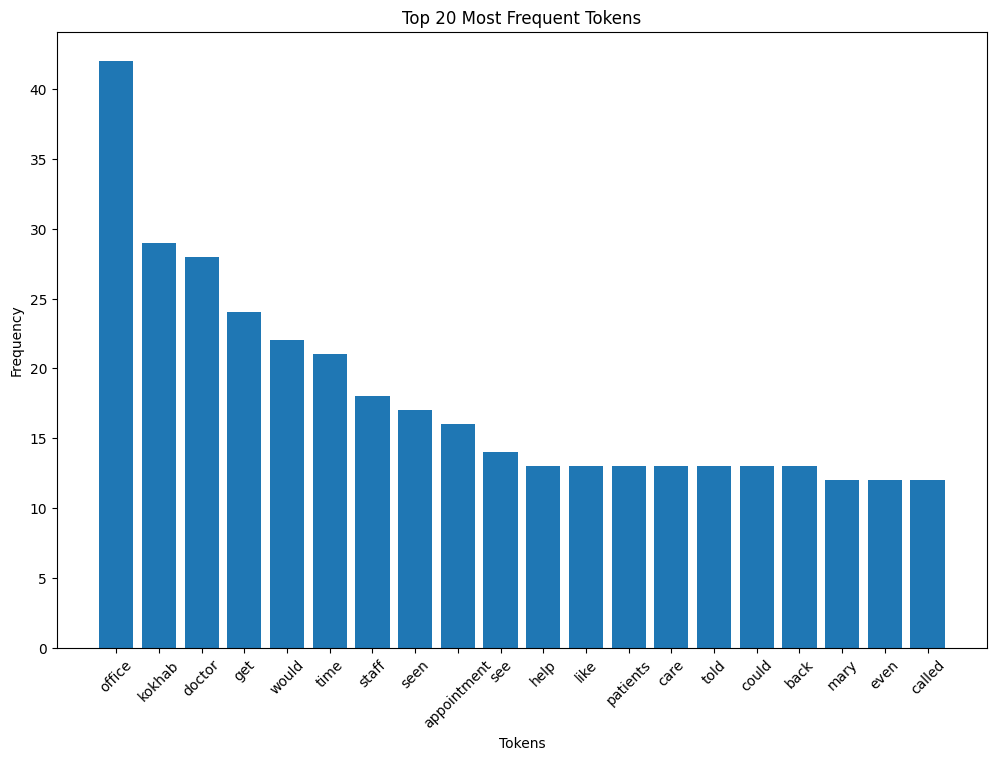

In [ ]:
from collections import Counter
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize

# If your Processed_Review column contains strings of normalized text
all_normalized_tokens = sum(reviews_df['Normalized_Review'].apply(word_tokenize).tolist(), [])

# Calculate the frequencies of each token
token_frequency = Counter(all_normalized_tokens)

# Determine the top N most frequent tokens, for example, top 20
top_tokens = token_frequency.most_common(20)

# Unpack the tokens and their counts for plotting
tokens, counts = zip(*top_tokens)

# Create a bar chart
plt.figure(figsize=(12, 8))
plt.bar(tokens, counts)
plt.xlabel('Tokens')
plt.ylabel('Frequency')
plt.title('Top 20 Most Frequent Tokens')
plt.xticks(rotation=45)
plt.show()

